## Introduction to Neural Network Based Deep Learning

### CNN on Cifar10 Dataset

#### Importing Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

#### Data Preprocessing

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #transform & normalize data
batch_size = 16
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=batch_size,shuffle=True, num_workers=2)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
test_loader = DataLoader(test_set, batch_size=batch_size,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') #set classes


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2) #outputs 6 channels
        self.conv2 = nn.Conv2d(6, 16, 5) 
        self.fc1 = nn.Linear(16 * 5 * 5, 120) #5*5 dimension of conv2d
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) #no activation needed here
        return x


cnn = CNN()
cnn

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [4]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.0001, momentum=0.9)


In [5]:
for epoch in range(100):  # iterate over each epoch

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad() #zero the gradients
        outputs =cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() #print loss
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %3d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('....Done Training')
PATH = './cifar_net.pth'
torch.save(cnn.state_dict(), PATH)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1, 2000] loss: 2.302
[2, 2000] loss: 2.291
[3, 2000] loss: 2.208
[4, 2000] loss: 2.102
[5, 2000] loss: 2.018
[6, 2000] loss: 1.899
[7, 2000] loss: 1.809
[8, 2000] loss: 1.731
[9, 2000] loss: 1.670
[10, 2000] loss: 1.625
[11, 2000] loss: 1.589
[12, 2000] loss: 1.553
[13, 2000] loss: 1.517
[14, 2000] loss: 1.489
[15, 2000] loss: 1.464
[16, 2000] loss: 1.438
[17, 2000] loss: 1.414
[18, 2000] loss: 1.396
[19, 2000] loss: 1.367
[20, 2000] loss: 1.347
[21, 2000] loss: 1.332
[22, 2000] loss: 1.315
[23, 2000] loss: 1.298
[24, 2000] loss: 1.279
[25, 2000] loss: 1.262
[26, 2000] loss: 1.252
[27, 2000] loss: 1.230
[28, 2000] loss: 1.210
[29, 2000] loss: 1.194
[30, 2000] loss: 1.187
[31, 2000] loss: 1.170
[32, 2000] loss: 1.154
[33, 2000] loss: 1.146
[34, 2000] loss: 1.136
[35, 2000] loss: 1.128
[36, 2000] loss: 1.108
[37, 2000] loss: 1.104
[38, 2000] loss: 1.099
[39, 2000] loss: 1.084
[40, 2000] loss: 1.078
[41, 2000] loss: 1.063
[42, 2000] loss: 1.050
[43, 2000] loss: 1.046
[44, 2000] loss: 1.0

In [7]:

cnn.load_state_dict(torch.load(PATH))


<All keys matched successfully>

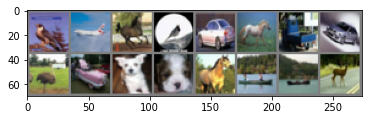

In [8]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
_, predicted = torch.max(outputs, 1)
def imshow(img): #normalize and show sample
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# fetch images to train
dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))# print labels

outputs = cnn(images)

In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy: %d %%' % (
    100 * correct / total))


Accuracy: 64 %


In [10]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in test_loader:
        images, labels = data    
        outputs = cnn(images)    
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

  
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, 
                                                   accuracy))


Accuracy for class plane is: 69.7 %
Accuracy for class car   is: 78.5 %
Accuracy for class bird  is: 46.2 %
Accuracy for class cat   is: 48.8 %
Accuracy for class deer  is: 55.9 %
Accuracy for class dog   is: 48.8 %
Accuracy for class frog  is: 76.5 %
Accuracy for class horse is: 73.6 %
Accuracy for class ship  is: 74.8 %
Accuracy for class truck is: 70.9 %
